In [1]:
import pandas as pd
import numpy as np
from scipy.stats import distributions
import statistics
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import random
import sympy as sp
import os
import argparse
from scipy.signal import argrelextrema
from sympy.utilities import lambdify
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats 

path = '/Users/aibekk99/Desktop/3x3_new.csv'
df = pd.read_csv(path)
# turn df to matrices
stable = [] 
f1 = df['1st']
f2 = df['2nd']
f3 = df['3rd']
f4 = df['4th']
f5 = df['5th']
f6 = df['6th']
f7 = df['7th']
f8 = df['8th']
f9 = df['9th']
for i in range(len(df['1st'])):
    m = np.array([[f1[i], f2[i], f3[i]],
                  [f4[i], f5[i], f6[i]],
                  [f7[i], f8[i], f9[i]]], dtype=float)
    stable.append(m)
t1a = []
t1ar = []
t1ai = []
t1b = []
t1br = []
t1bi = []
t2a = []
t2ar = []
t2ai = []
t2b = []
t2br = []
t2bi = []
tu = []
tur = []
tui = []
th = []
thr = []
thi = []

turing_matrices = []        # for bp, kde

k = np.arange(0, 101, 0.2) 
D = np.diag([1,100,0])

for m in stable:
    Em = []
    Emi = []
    for i in range(len(k)):
        R = m - D * (k[i] ** 2)
        eigval = np.linalg.eigvals(R)
        Em.append(np.max(np.real(eigval)))
        idx_max = np.argmax(np.real(eigval))
        Emi.append(np.imag(eigval[idx_max]))
    a = np.max(Em)
    index = np.argmax(Em)
    nEm = np.array(Em)
    if a > 0:
        if Emi[index] == 0:
            numZeroCrossing = np.count_nonzero(np.diff(np.sign(Em)))  # Count zero crossings
            numpositivelocalmaxima = np.sum(nEm[argrelextrema(nEm,np.greater)]>0) > 0   #((nEm[np.where(argrelextrema(nEm, np.greater))[0]] > 0)) > 0
            if numpositivelocalmaxima > 0 and numZeroCrossing % 2 == 0:
                t1a.append(m)
                turing_matrices.append(m)
                t1ar.append(Em)
                t1ai.append(Emi)
            elif numpositivelocalmaxima > 0 and numZeroCrossing == 1:
                t1b.append(m)
                turing_matrices.append(m)
                t1br.append(Em)
                t1bi.append(Emi)
            elif numpositivelocalmaxima == 0 and numZeroCrossing % 2 == 1:
                t2a.append(m)
                t2ar.append(Em)
                t2ai.append(Emi)
            elif numpositivelocalmaxima > 0 and numZeroCrossing % 2 == 1:
                t2b.append(m)
                t2br.append(Em)
                t2bi.append(Emi)
            else:
                tu.append(m)
                tur.append(Em)
                tui.append(Emi)
        else:
            th.append(m)
            thr.append(Em)
            thi.append(Emi)

tr1a = len(t1a)
tr1b = len(t1b)
tr2a = len(t2a)
tr2b = len(t2b)
tth = len(th)
ttu = len(tu)

e1 = []
e2 = [] 
e3 = [] 
e4 = [] 
e5 = [] 
e6 = [] 
e7 = [] 
e8 = [] 
e9 = []
for matrix in turing_matrices:
    e1.append(float(matrix[0, 0]))
    e2.append(float(matrix[0, 1]))
    e3.append(float(matrix[0, 2]))
    e4.append(float(matrix[1, 0]))
    e5.append(float(matrix[1, 1]))
    e6.append(float(matrix[1, 2]))
    e7.append(float(matrix[2, 0]))
    e8.append(float(matrix[2, 1]))
    e9.append(float(matrix[2, 2]))
df = pd.DataFrame([e1,e2,e3,e4,e5,e6,e7,e8,e9])
fdf = df.transpose()
fdf.columns = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th']
path2 = '/Users/aibekk99/Desktop/'
fdf.to_csv(os.path.join(path2, '3x3tr.csv'), index=False)
print(f'{tr1a} type 1a instabilities')
print(f'{tr1b} type 1b instabilities')
print(f'{tr2a} type 2a instabilities')
print(f'{tr2b} type 2b instabilities')
print(f'{tth} hopf instabilities')
print(f'{ttu} unknown instabilities')

1959 type 1a instabilities
0 type 1b instabilities
0 type 2a instabilities
0 type 2b instabilities
5 hopf instabilities
0 unknown instabilities


In [4]:
path3 = '/Users/aibekk99/Desktop/3x3tr.csv'
df3 = pd.read_csv(path3)
df3.head()

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th
0,0.231849,-0.136197,0.0,0.496097,-0.458474,-0.077875,-3.288163,-0.204878,-0.617534
1,0.159666,-0.197014,0.0,1.219968,-0.345936,-0.078369,-0.281340,-0.108845,-0.474854
2,0.195137,-0.086648,0.0,2.517388,-0.238975,-0.068783,-1.007248,-0.175787,-0.958675
3,0.062549,-0.064639,0.0,0.342621,-0.735395,-1.297140,-0.233236,-0.091491,-0.495689
4,0.157290,-0.272672,0.0,1.053622,-0.285755,-0.038786,-0.053371,-0.274889,-0.945653


In [5]:
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats 
# fitting distributions
entry1 = df3['1st']
entry2 = df3['2nd']
entry3 = df3['3rd']
entry4 = df3['4th']
entry5 = df3['5th']
entry6 = df3['6th']
entry7 = df3['7th']
entry8 = df3['8th']
entry9 = df3['9th']

def fitter(entry):
    f = Fitter(np.array(entry, dtype=float),
           distributions=['gamma',
                          'lognorm',
                          "expon",
                          "beta",
                          "burr",
                          "norm",
                          "uniform",
                          "cauchy",
                          "chi",
                          "erlang"
                          "levy",
                          "rayleigh"])
    f.fit()
    fit = f.fitted_param.get('beta', None)
    return fit

#f.fit()
#f.summary()

# beta distribution parameters 
params1 = fitter(entry1)
params2 = fitter(entry2)
params3 = fitter(entry3)
params4 = fitter(entry4)
params5 = fitter(entry5)
params6 = fitter(entry6)
params7 = fitter(entry7)
params8 = fitter(entry8)
params9 = fitter(entry9)

Fitting 11 distributions:   0%|          | 0/11 [00:00<?, ?it/s]SKIPPED erlanglevy distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
Fitting 11 distributions: 100%|██████████| 11/11 [00:00<00:00, 39.75it/s]


[]

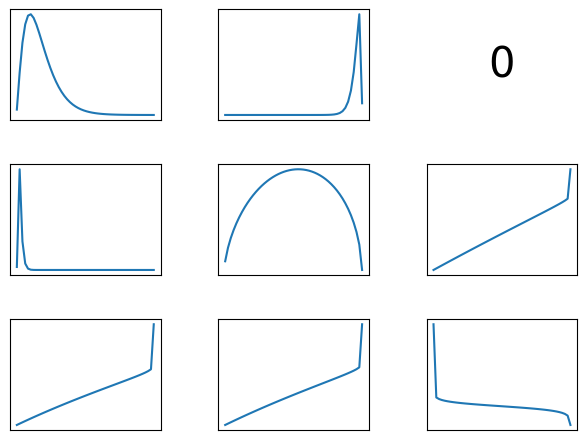

In [9]:
# plotting distributions
fig, axs = plt.subplots(3, 3)
fig.tight_layout()


axs[1,2].set_yscale('log')
axs[2, 0].set_yscale('log')
axs[2, 1].set_yscale('log')
axs[2, 2].set_yscale('log')


x1 = np.linspace(np.min(np.array(entry1, dtype=float)), np.max(np.array(entry1, dtype=float)))
axs[0,0].plot(x1, scipy.stats.beta.pdf(x1, params1[0], params1[1], loc=params1[2], scale=params1[3]),)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
#axs[0,0].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x2 = np.linspace(np.min(np.array(entry2, dtype=float)), np.max(np.array(entry2, dtype=float)))
axs[0,1].plot(x2, scipy.stats.beta.pdf(x2, params2[0], params2[1], loc=params2[2], scale=params2[3]),)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
#axs[0,1].set_title('Gamma Distribution', fontsize = 10, fontweight = 'bold')
#
x3 = np.linspace(np.min(np.array(entry3, dtype=float)), np.max(np.array(entry3, dtype=float)))
axs[0,2].axis('off')
axs[0,2].text(0.5, 0.5, '0', fontsize=30, ha='center', va='center')
#axs[1,0].set_title('Exponential Distribution', fontsize = 10, fontweight = 'bold')
#
x4 = np.linspace(np.min(np.array(entry4, dtype=float)), np.max(np.array(entry4, dtype=float)))
axs[1,0].plot(x4, scipy.stats.beta.pdf(x4, params4[0], params4[1], loc=params4[2], scale=params4[3]),)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

x5 = np.linspace(np.min(np.array(entry5, dtype=float)), np.max(np.array(entry5, dtype=float)))
axs[1,1].plot(x5, scipy.stats.beta.pdf(x5, params5[0], params5[1], loc=params5[2], scale=params5[3]),)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

x6 = np.linspace(np.min(np.array(entry6, dtype=float)), np.max(np.array(entry6, dtype=float)))
axs[1,2].plot(x6, scipy.stats.beta.pdf(x6, params6[0], params6[1], loc=params6[2], scale=params6[3]),)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

x7 = np.linspace(np.min(np.array(entry7, dtype=float)), np.max(np.array(entry7, dtype=float)))
axs[2,0].plot(x7, scipy.stats.beta.pdf(x7, params7[0], params7[1], loc=params7[2], scale=params7[3]),)
#axs[2,0].axvline(x=0)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([])

x8 = np.linspace(np.min(np.array(entry8, dtype=float)), np.max(np.array(entry8, dtype=float)))
axs[2,1].plot(x8, scipy.stats.beta.pdf(x8, params8[0], params8[1], loc=params8[2], scale=params8[3]),)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

x9 = np.linspace(np.min(np.array(entry9, dtype=float)), np.max(np.array(entry9, dtype=float)))
axs[2,2].plot(x9, scipy.stats.beta.pdf(x9, params9[0], params9[1], loc=params9[2], scale=params9[3]),)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])
